In [1]:
# Import Dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
pd.set_option('display.max_rows', 1000)

In [2]:
#Importing dataset
data_df = pd.read_csv(r"C:\Users\muthukumar\Desktop\005_SaveNWBCSHere\03_Activities&HW\07-git\us-counties\USCounties.csv")


In [3]:
#Display the dataset
data_df.head()

,date,county,state,fips,cases,deaths
0,1/21/2020,Snohomish,Washington,53061.0,1,0
1,1/22/2020,Snohomish,Washington,53061.0,1,0
2,1/23/2020,Snohomish,Washington,53061.0,1,0
3,1/24/2020,Cook,Illinois,17031.0,1,0
4,1/24/2020,Snohomish,Washington,53061.0,1,0


In [5]:
#Cases,Deaths grouped by county
data_grouped = data_df.groupby('state')
data_grouped_df = data_grouped['deaths', 'cases'].sum()
data_grouped_df

<ipython-input-5-4405a78f1c4f>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_grouped_df = data_grouped['deaths', 'cases'].sum()


,deaths,cases
state,,
Alabama,258685,13757084
Alaska,4341,672494
Arizona,545236,22271168
Arkansas,100218,7038898
California,1603639,77374476
Colorado,307374,7999143
Connecticut,746270,8760794
Delaware,88623,2491768
District of Columbia,95592,2060919


In [7]:
data_grouped_c_df = data_grouped_df[data_grouped_df['deaths'] >= 100000].sort_values(by = 'deaths', ascending = False)
data_grouped_f_df = data_grouped_c_df.reset_index()
data_grouped_f_df

,state,deaths,cases
0,New York,5777867,77438537
1,New Jersey,2549308,33009985
2,California,1603639,77374476
3,Massachusetts,1426483,20355693
4,Texas,1306932,67974708
5,Florida,1265202,65213390
6,Illinois,1255840,32987839
7,Pennsylvania,1194116,20251638
8,Michigan,1127430,16490414
9,Connecticut,746270,8760794


In [8]:
data_grouped_c_df = data_grouped_f_df[:10]
data_grouped_c_df

,state,deaths,cases
0,New York,5777867,77438537
1,New Jersey,2549308,33009985
2,California,1603639,77374476
3,Massachusetts,1426483,20355693
4,Texas,1306932,67974708
5,Florida,1265202,65213390
6,Illinois,1255840,32987839
7,Pennsylvania,1194116,20251638
8,Michigan,1127430,16490414
9,Connecticut,746270,8760794


Text(0.5, 1.0, 'US State Covid Deaths')

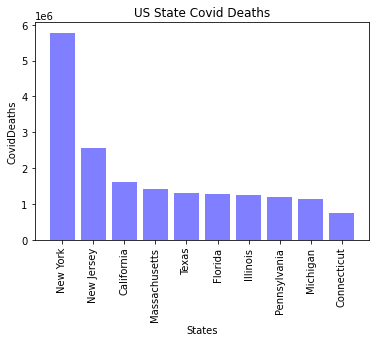

In [34]:
#Visualization of Covid deaths vs cases in the top10 affected US counties
states = data_grouped_c_df['state']
states
dths = data_grouped_c_df['deaths']
#css = data_grouped_c_df['cases']

#Create a bar chart based upon the above data 
plt.bar(states, dths, color='b', alpha=0.5, align="center")
# Create the ticks for our bar chart's x axis 

plt.xticks(states, rotation="vertical")
plt.xlabel('States')
plt.ylabel('CovidDeaths')
plt.title('US State Covid Deaths')